Credit Card Clients

Import Libraries

In [2]:
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


Import Data

In [3]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

payment_dataframe = pd.read_excel("default of credit card clients.xls", skiprows=[0])
payment_dataframe = payment_dataframe.reindex(
    np.random.permutation(payment_dataframe.index))
print(payment_dataframe.head(10))

          ID  LIMIT_BAL  SEX  ...  PAY_AMT5  PAY_AMT6  default payment next month
7945    7946      20000    2  ...      1000       282                           1
16536  16537     500000    1  ...      5021      4350                           0
26726  26727     150000    1  ...       660         0                           0
16333  16334      60000    2  ...      1029      1074                           1
20629  20630     220000    1  ...      1019      1045                           0
321      322     340000    2  ...      2732     50000                           0
9579    9580      50000    1  ...      2000      1000                           0
27004  27005      60000    1  ...         0         0                           0
2360    2361      20000    2  ...         0      1664                           0
6593    6594      50000    1  ...       683       680                           0

[10 rows x 25 columns]


In [4]:
payment_dataframe.shape[0]

30000

Preprocess

In [0]:
def preprocess_features(payment_dataframe):

  selected_features = payment_dataframe[
    ["LIMIT_BAL",
     "SEX",
     "EDUCATION",
     "MARRIAGE",
     "AGE",
     "PAY_0",
     "PAY_2",
     "PAY_3",
     "PAY_4",
     "PAY_5",
     "PAY_6",
     "BILL_AMT1",
     "BILL_AMT2",
     "BILL_AMT3",
     "BILL_AMT4",
     "BILL_AMT5",
     "BILL_AMT6",
     "PAY_AMT1",
     "PAY_AMT2",
     "PAY_AMT3",
     "PAY_AMT4",
     "PAY_AMT5",
     "PAY_AMT6"]]
    
  processed_features = selected_features.copy()
  
  return processed_features

def preprocess_targets(payment_dataframe):

  output_targets = payment_dataframe["default payment next month"]
  return output_targets

Calculating Baseline

In [6]:
(payment_dataframe["default payment next month"].value_counts()) / (payment_dataframe["default payment next month"].size) * 100

# Majority class is 0. The baseline is ~80%.

0   77.9
1   22.1
Name: default payment next month, dtype: float64

Train/Validation Split

In [7]:
# Choose the first 24000 examples for training.
training_examples = preprocess_features(payment_dataframe.head(24000))
training_targets = preprocess_targets(payment_dataframe.head(24000))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)
print(training_examples.head(20))


# Choose the 6000 examples for validation.
validation_examples = preprocess_features(payment_dataframe.tail(6000))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)
validation_targets = preprocess_targets(payment_dataframe.tail(6000))



# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())


       LIMIT_BAL  SEX  EDUCATION  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6
7945        -1.1  0.8        0.2  ...      -0.3      -0.2      -0.3
16536        2.6 -1.2        0.2  ...      -0.0       0.0      -0.0
26726       -0.1 -1.2       -1.1  ...      -0.3      -0.3      -0.3
16333       -0.8  0.8        0.2  ...      -0.2      -0.2      -0.2
20629        0.4 -1.2       -1.1  ...      -0.3      -0.2      -0.2
...          ...  ...        ...  ...       ...       ...       ...
12965       -0.7  0.8       -1.1  ...       1.0      -0.3      -0.2
27417        0.3 -1.2       -1.1  ...      -0.3      -0.3       0.5
272          0.7  0.8       -1.1  ...      -0.3      -0.3      -0.3
20122        0.6  0.8        0.2  ...       0.1       0.0       0.1
4387        -0.6 -1.2        0.2  ...      -0.3      -0.3      -0.3

[20 rows x 23 columns]
Training examples summary:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0,24000.0
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-1.2,-1.2,-2.3,-3.0,-1.6,-1.8,-1.6,-1.5,-1.5,-1.5,-1.5,-3.0,-1.6,-3.0,-3.3,-2.0,-6.4,-0.3,-0.2,-0.3,-0.3,-0.3,-0.3
25%,-0.9,-1.2,-1.1,-1.1,-0.8,-0.9,-0.7,-0.7,-0.7,-0.6,-0.6,-0.6,-0.6,-0.6,-0.6,-0.6,-0.6,-0.3,-0.2,-0.3,-0.3,-0.3,-0.3
50%,-0.2,0.8,0.2,0.9,-0.2,0.0,0.1,0.1,0.2,0.2,0.3,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
75%,0.6,0.8,0.2,0.9,0.6,0.0,0.1,0.1,0.2,0.2,0.3,0.2,0.2,0.2,0.2,0.2,0.2,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1
max,6.4,0.8,5.2,2.8,4.7,7.1,6.8,6.8,7.0,7.3,7.2,12.5,13.2,23.4,13.2,14.7,15.5,51.4,68.4,49.6,39.0,26.9,29.4


Validation examples summary:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0,6000.0
mean,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.6,0.9,1.0,0.9,1.0
min,-1.2,-1.2,-2.3,-3.0,-1.6,-1.8,-1.6,-1.5,-1.5,-1.5,-1.5,-0.8,-1.7,-1.0,-1.4,-1.4,-3.2,-0.3,-0.2,-0.3,-0.3,-0.3,-0.3
25%,-0.8,-1.2,-1.1,-1.1,-0.8,-0.9,-0.7,-0.7,-0.7,-0.6,-0.6,-0.6,-0.6,-0.6,-0.6,-0.6,-0.6,-0.3,-0.2,-0.3,-0.3,-0.3,-0.3
50%,-0.2,0.8,0.2,0.9,-0.2,0.0,0.1,0.1,0.2,0.2,0.3,-0.4,-0.4,-0.4,-0.4,-0.4,-0.4,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2
75%,0.6,0.8,0.2,0.9,0.6,0.0,0.1,0.1,0.2,0.2,0.3,0.2,0.2,0.2,0.2,0.2,0.2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.1
max,4.9,0.8,5.2,2.8,4.1,7.1,5.9,6.0,6.1,6.4,6.3,8.2,8.8,9.4,10.3,12.9,7.8,23.6,14.4,20.4,33.2,19.9,24.6


Training targets summary:


count   24000.0
mean        0.2
std         0.4
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: default payment next month, dtype: float64

Validation targets summary:


count   6000.0
mean       0.2
std        0.4
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        1.0
Name: default payment next month, dtype: float64

In [8]:
training_examples.shape

#training_targets.shape

(24000, 23)

Build Model

In [9]:
baseline_model = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(300, activation=tf.nn.relu,),
    keras.layers.Dense(1,activation=tf.nn.sigmoid,)

  ])

baseline_model.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               12000     
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 301       
Total params: 162,601
Trainable params: 162,601
Non-trainable params: 0
_________________________________________________________________


Fit Model

In [0]:

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[callback])



In [12]:
print(min(b_history.history['accuracy']))

0.81329167


Plot Results

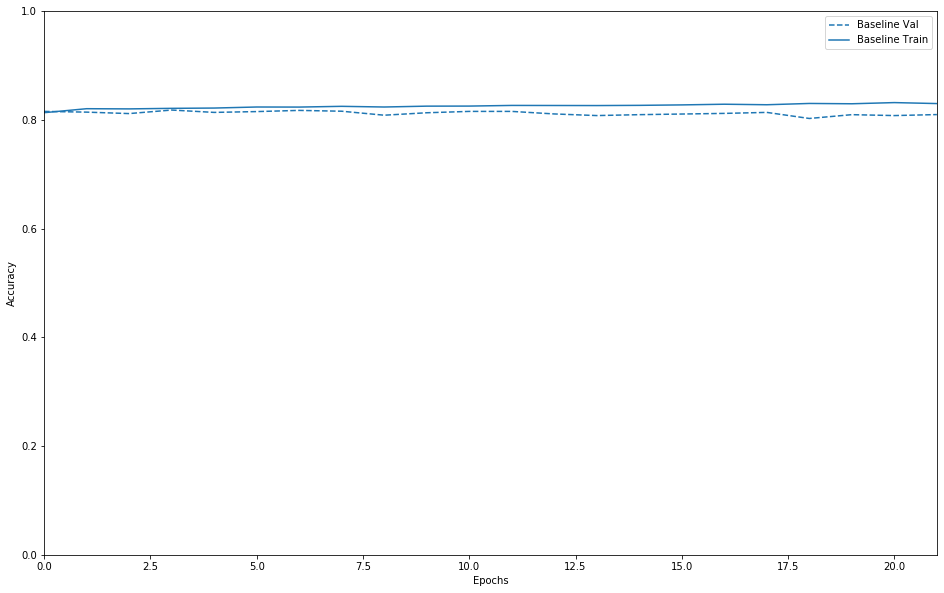

In [13]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history)])

Predictions

In [14]:
valpreds = baseline_model.predict_on_batch(validation_examples)
print(valpreds)

tf.Tensor(
[[0.21339622]
 [0.07325274]
 [0.12732482]
 ...
 [0.01270369]
 [0.16094176]
 [0.1947252 ]], shape=(6000, 1), dtype=float32)


In [0]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(validation_targets)

<BarContainer object of 500 artists>

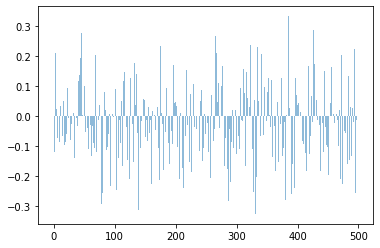

In [0]:
# Plot Weights
nfw = baseline_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

PART 2:	Compare at least one of the models from above with respect to the following hyper-parameters.

a.	1 Hidden Layer vs 2 Hidden Layers

In [15]:
# Build Model 1 with 1 hidden layer
baseline_model1 = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(300, activation=tf.nn.relu,),
    keras.layers.Dense(1,activation=tf.nn.sigmoid,)

  ])

baseline_model1.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model1.summary()

# Build Model 2 with 2 hidden layer
baseline_model2 = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(300, activation=tf.nn.relu,),
    keras.layers.Dense(300, activation=tf.nn.relu,),
    keras.layers.Dense(1,activation=tf.nn.sigmoid,)

  ])

baseline_model2.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model2.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               12000     
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 162,601
Trainable params: 162,601
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               12000     
_________________________________________________________________
dense_7 (Dense)              (None, 300)               150300    
__________________________

In [16]:
# Fit Model 1
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
b_history1 = baseline_model1.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[callback])

# Fit Model 2
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
b_history2 = baseline_model2.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[callback])

print(max(b_history1.history['accuracy']))
print(max(b_history2.history['accuracy']))


0.828375
0.82795835


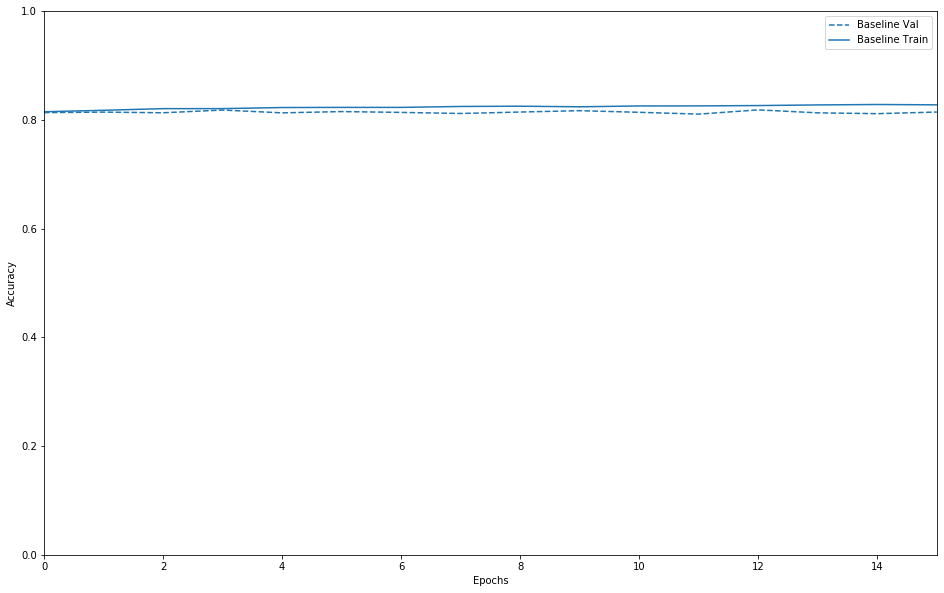

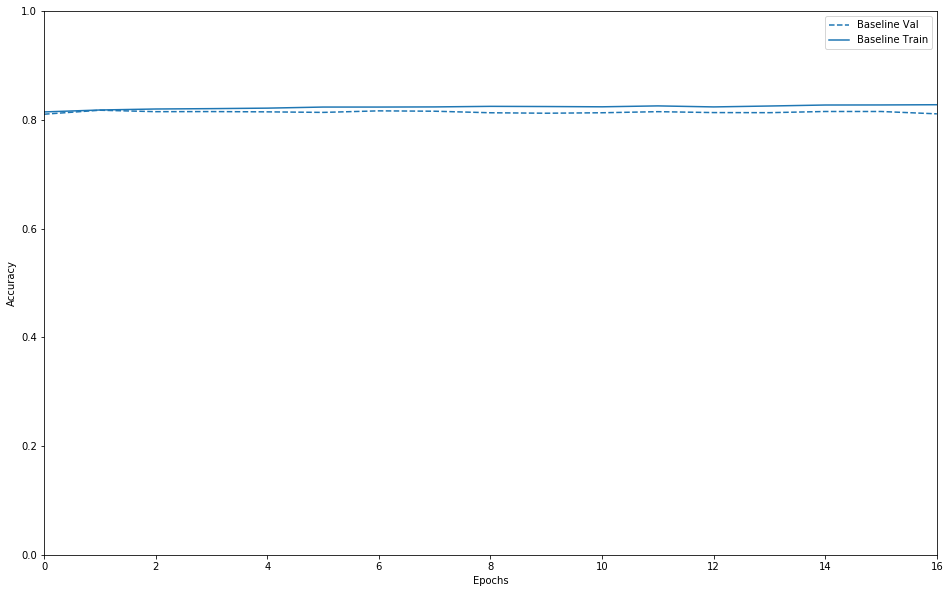

In [23]:
#Plot results for model 1 and model 2

import matplotlib.pyplot as plt

#Plot model 1
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history1)])

# Plot model 2
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history2)])

Comparing results:
Accuracy for both the models (with 1 hidden layer and with 2 hidden layers) is almost similar.

In general, addition of hidden layers helps improve the model, but only up to a certain point, and further addition of layers can actually harm the model's performance.
Adding more neurons (making the network "wider") or layers (making it "deeper") would be improving accuracy, but at some point the accuracy would start dropping, as the model would start overfitting to training set. 
When you unnecessarily increase hidden layers, your model ends up learning more no.of parameters than are needed to solve your problem. Since this is a simple model addidng 1 layer did not affect the accuracy much.

b.	No of neurons in hidden layers between (a)2/3 the size of the input layer, plus the size of the output layer, and (b) twice the size of the input layer

In [19]:
# (a)2/3 the size of the input layer, plus the size of the output layer

# Build model 3
baseline_model3 = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(334, activation=tf.nn.relu,),
    keras.layers.Dense(1,activation=tf.nn.sigmoid,)

  ])

baseline_model3.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model3.summary()


# twice the size of the input layer

# Build model 4
baseline_model4 = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(1000, activation=tf.nn.relu,),
    keras.layers.Dense(1,activation=tf.nn.sigmoid,)

  ])

baseline_model4.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 500)               12000     
_________________________________________________________________
dense_11 (Dense)             (None, 334)               167334    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 335       
Total params: 179,669
Trainable params: 179,669
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 500)               12000     
_________________________________________________________________
dense_14 (Dense)             (None, 1000)              501000    
__________________________

In [20]:
# Fit Model 3
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
b_history3 = baseline_model1.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[callback])

# Fit Model 4
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
b_history4 = baseline_model4.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[callback])

print(min(b_history3.history['accuracy']))
print(min(b_history4.history['accuracy']))


0.828
0.8144583


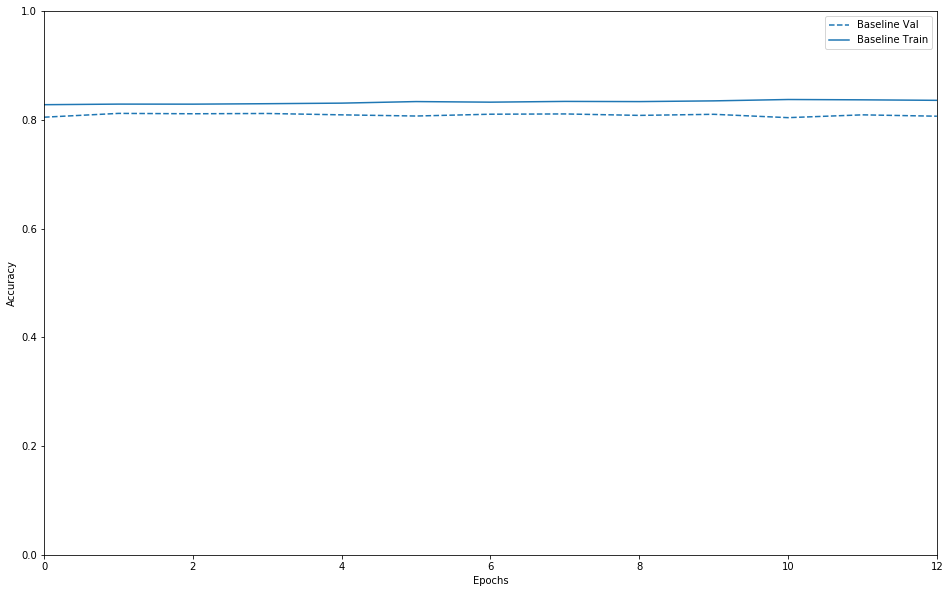

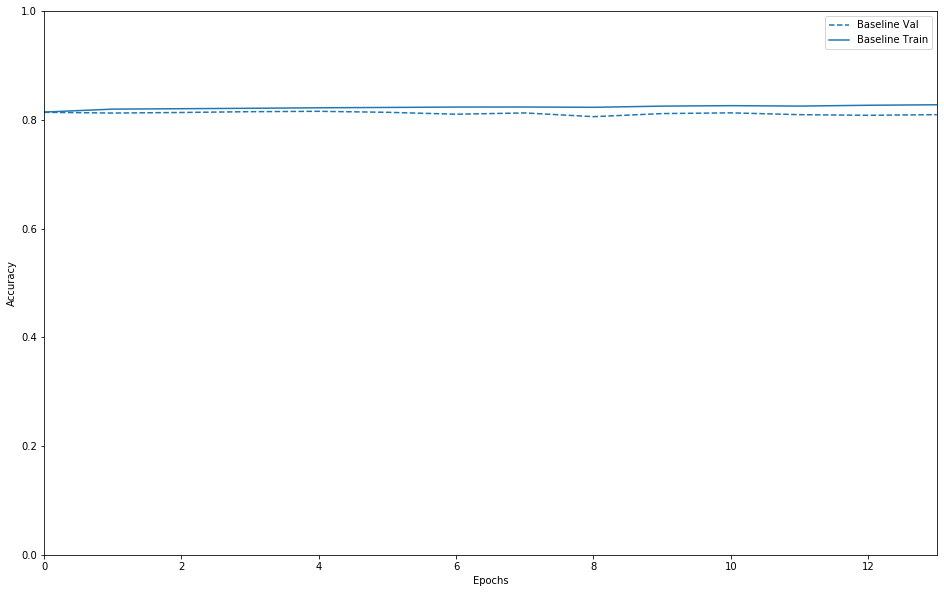

In [22]:
#Plot results for model 3 and model 4

import matplotlib.pyplot as plt

#Plot model 3
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history3)])

# Plot model 4
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history4)])

Accuracy for model with 2/3 the size of the input layer, plus the size of the output layer is better than twice the size of the input layer. This is because as capacity increases the gap between training and testing error (generalization gap) also increases. If the capacity is high, model is likely to overfit the data.

c. Regularized Models

In [0]:
l1_model = keras.Sequential([
    keras.layers.Dense(500, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(500, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(500, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(500, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.01), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])

l1_model.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])

l2_model = keras.Sequential([
    keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(100, kernel_regularizer=keras.regularizers.l2(0.1), activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])

l2_model.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])


In [0]:
l1_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
l1_history = l1_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[l1_callback])


l2_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
l2_history = l2_model.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[l2_callback])

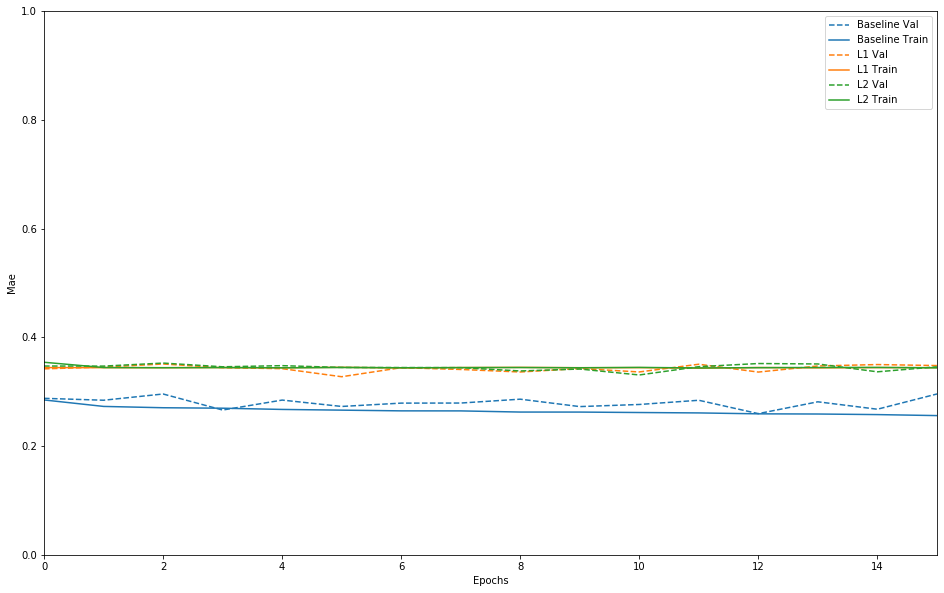

In [0]:
# Plot history Multiple
plot_history([('baseline', b_history),
              ('L1', l1_history),
              ('L2', l2_history)])

d.	Activation function - ReLU and your choice

In [24]:
# Build Model
baseline_model5 = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(4, activation=tf.nn.softmax,),
    keras.layers.Dense(1,activation=tf.nn.sigmoid,)

  ])

baseline_model5.compile(loss='binary_crossentropy',
                optimizer="rmsprop",
                metrics=['accuracy'])
baseline_model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 500)               12000     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 2004      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 14,009
Trainable params: 14,009
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fit Model
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
b_history5 = baseline_model5.fit(training_examples, training_targets, epochs=EPOCHS,
                    validation_data= (validation_examples, validation_targets), verbose=0,
                    callbacks=[callback])

In [26]:
print(min(b_history.history['accuracy']))

0.81329167


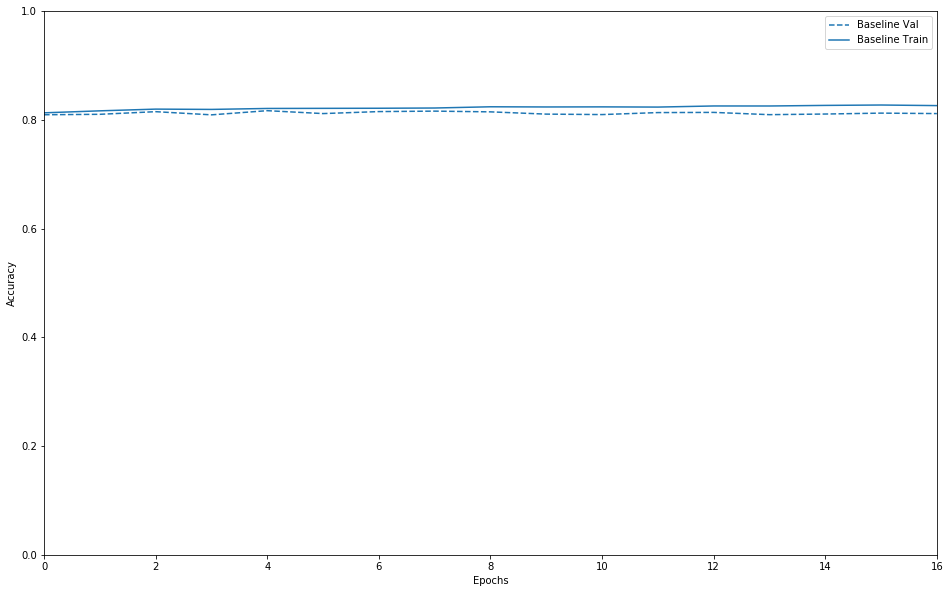

In [27]:
import matplotlib.pyplot as plt

#Plot model 5
def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history5)])

Here, Softmax activation function is used in the hidden layer along with RElu in the input and Sigmoid in the output layers. There is not much difference in accuracy as compared the above models using Relu in the hidden layers. The output of the softmax function is equivalent to a categorical probability distribution, it tells you the probability that any of the classes are true.